In [1]:
import pandas as pd

dataset_train = pd.read_csv('../../data/modified/addFeatureTrain.csv')
dataset_test = pd.read_csv('../../data/modified/addFeatureTest.csv')

x_train = dataset_train.drop('y', axis=1)
y_train = dataset_train['y']

x_test = dataset_test.drop('y', axis=1)
y_test = dataset_test['y']

In [2]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [3]:
print(len(x_train[0]))

360


In [4]:
import time
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

hidden_layers = np.arange(len(x_train[0]),2,-32)

mlp = MLPRegressor(hidden_layer_sizes=(hidden_layers), solver='adam', alpha=0.00001, random_state=1)
init = time.time()
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(mlp.score(x_test, y_test)))
print(cross_val_score(mlp, x_test, y_test, scoring='r2'))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

Execution time: 382.43728399276733 seconds
R2 score: 0.4806837426696884
[ 0.48272853  0.47432175  0.4735363 ]
MAE: 0.4304705906735535


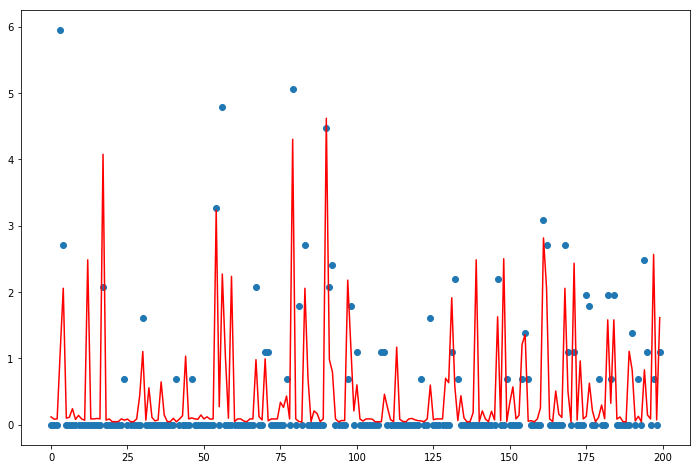

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.show()